In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import edo
from edo.pdfs import Uniform

In [2]:
def fitness(df):
    """ Determine the similarity of the dataframe to the unit circle. """

    return max(
        [
            df[0].var() - (df[1] - 1).abs().max(),
            df[1].var() - (df[0] - 1).abs().max(),
        ]
    )

def get_idxs(df):

    radius, angle = sorted(df.columns, key=lambda col: (df[col] - 1).abs().max())
    return radius, angle

In [9]:
Uniform.param_limits["bounds"] = [-2 * np.pi, 2 * np.pi]

_, _, pop_history, fit_history = edo.run_algorithm(
    fitness=fitness,
    size=500,
    row_limits=[100, 150],
    col_limits=[2, 2],
    pdfs=[Uniform],
    max_iter=100,
    best_prop=0.1,
    mutation_prob=0.005,
    maximise=True,
    seed=0,
)

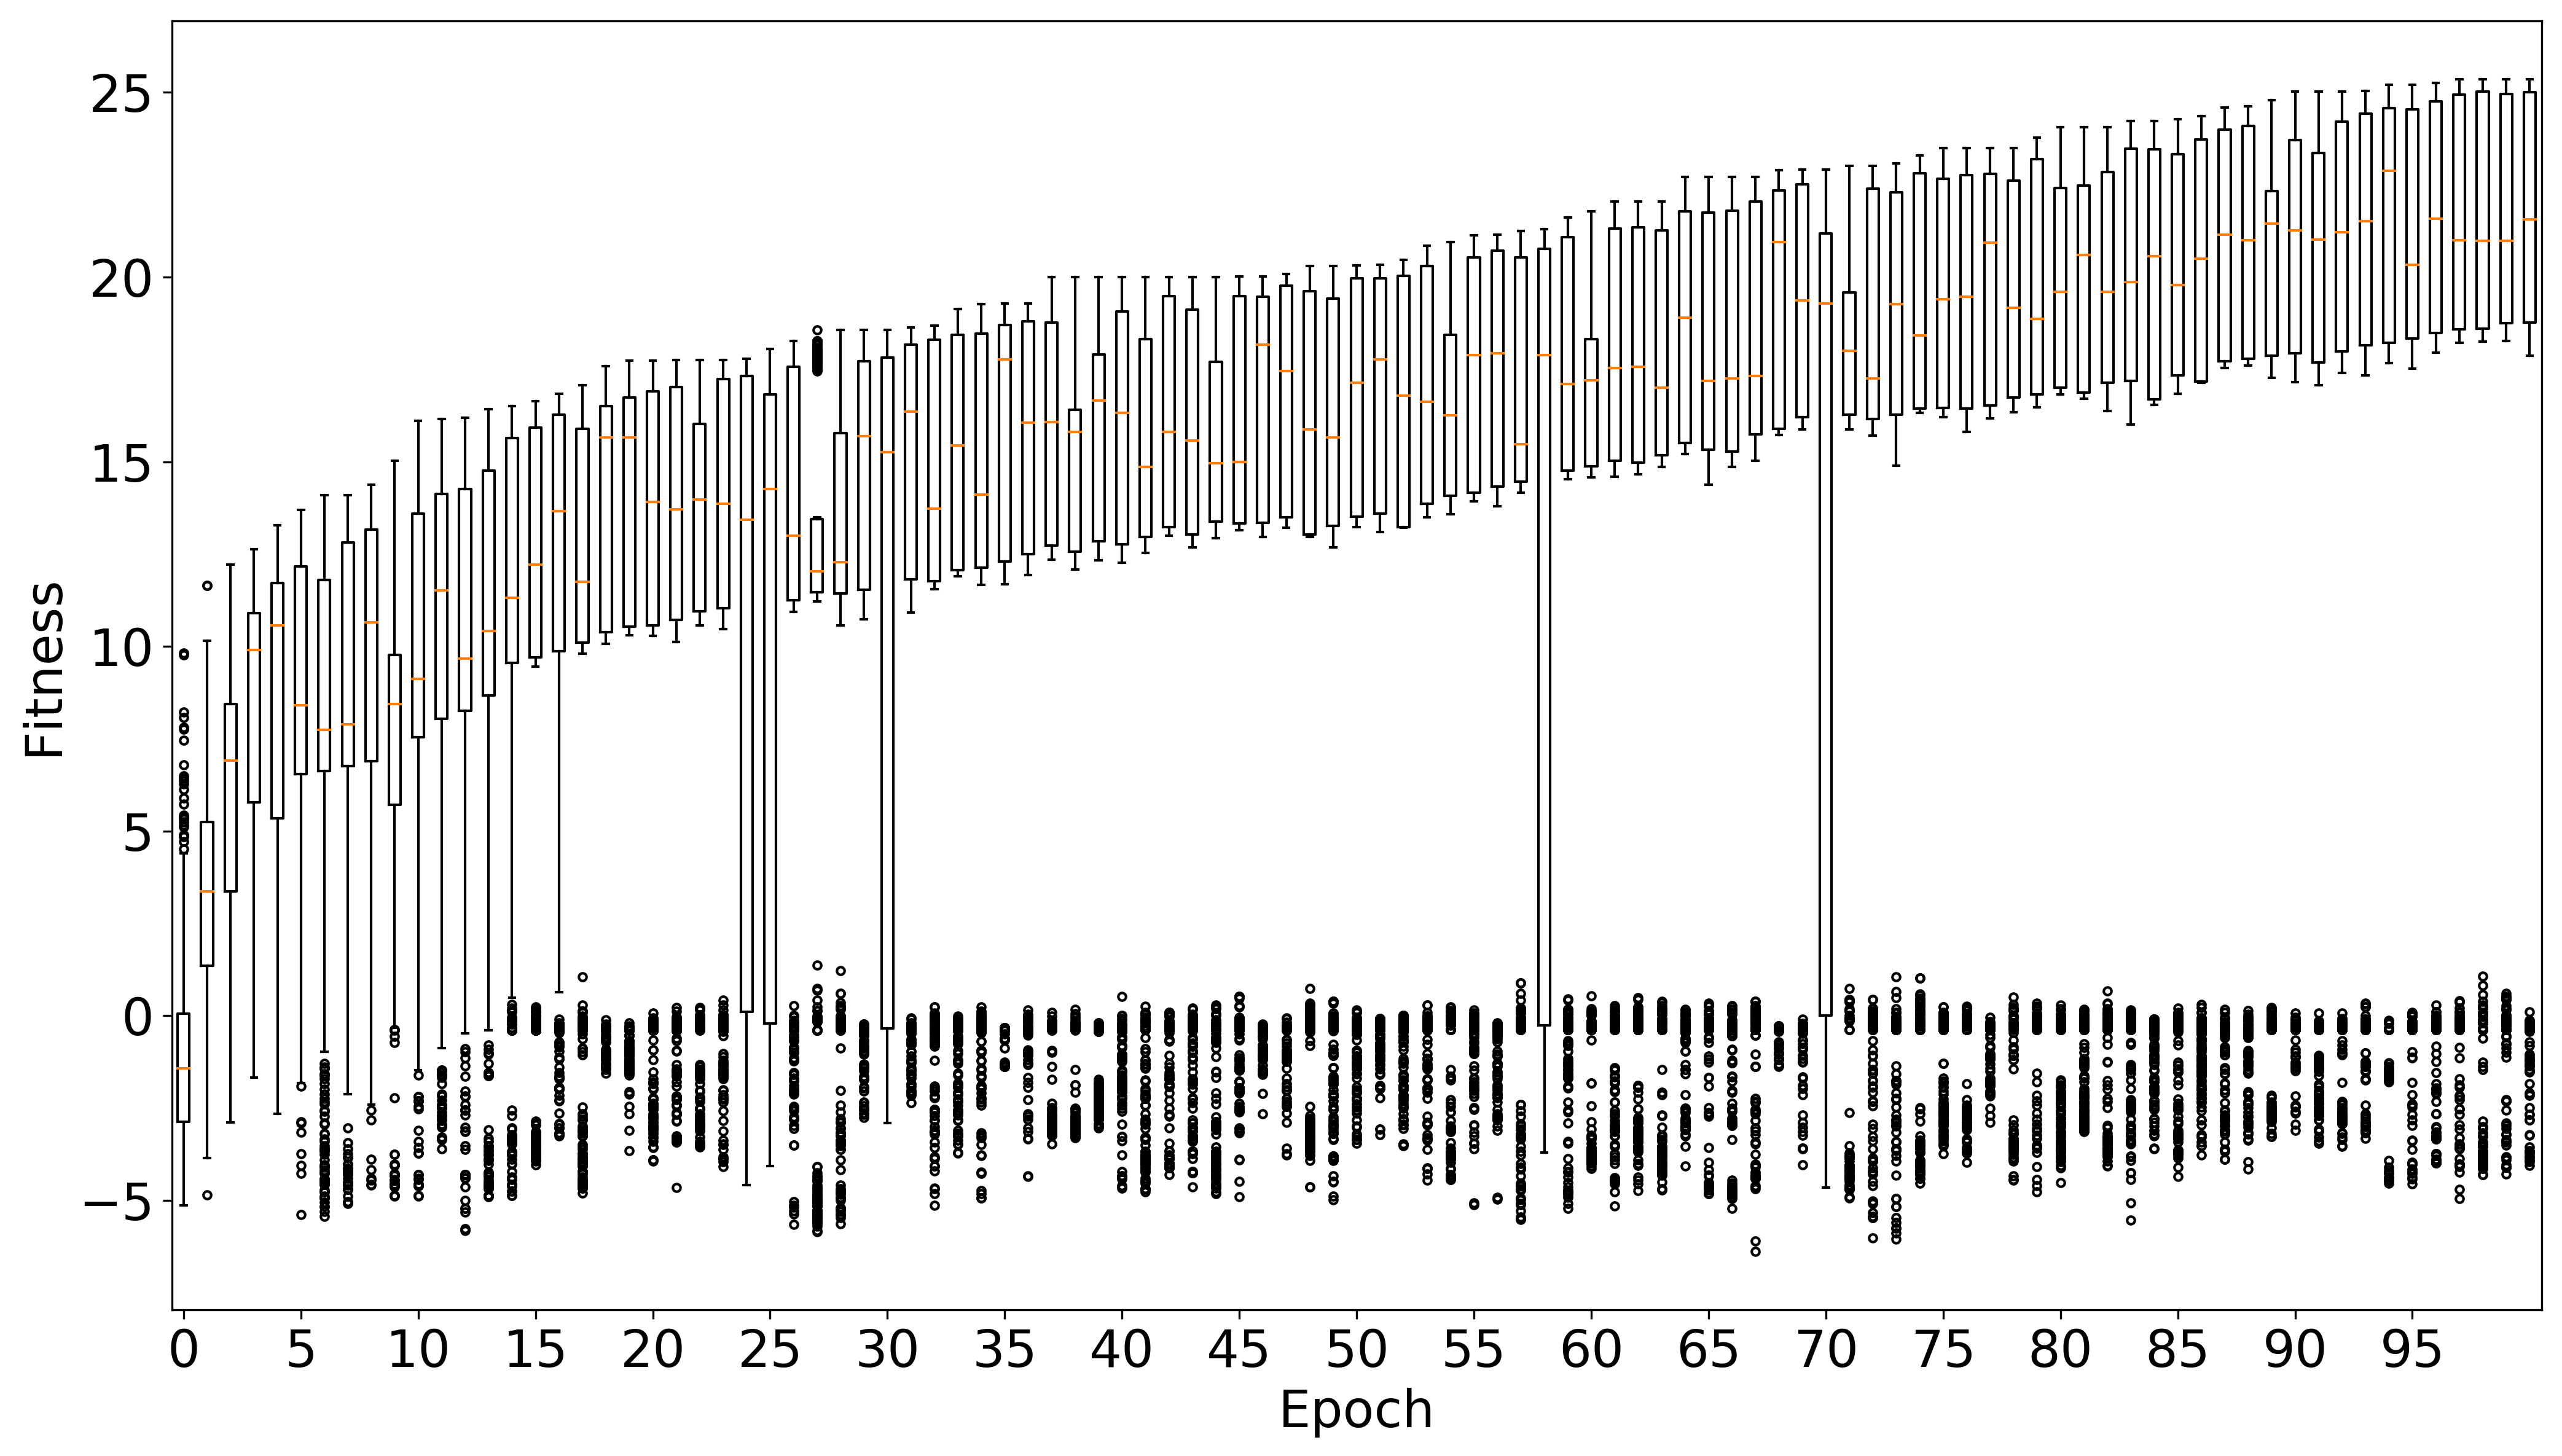

In [10]:
fig, ax = plt.subplots(1, figsize=(14, 8), dpi=300)
fs = 20

ax.boxplot(fit_history, sym=".")
ax.set_xlabel("Epoch", fontsize=fs)
ax.set_ylabel("Fitness", fontsize=fs)
ax.set_xticks(range(1, 101, 5))
ax.set_xticklabels(range(0, 101, 5))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(fs)

plt.tight_layout()
plt.savefig("out/fitness.pdf", transparent=True);

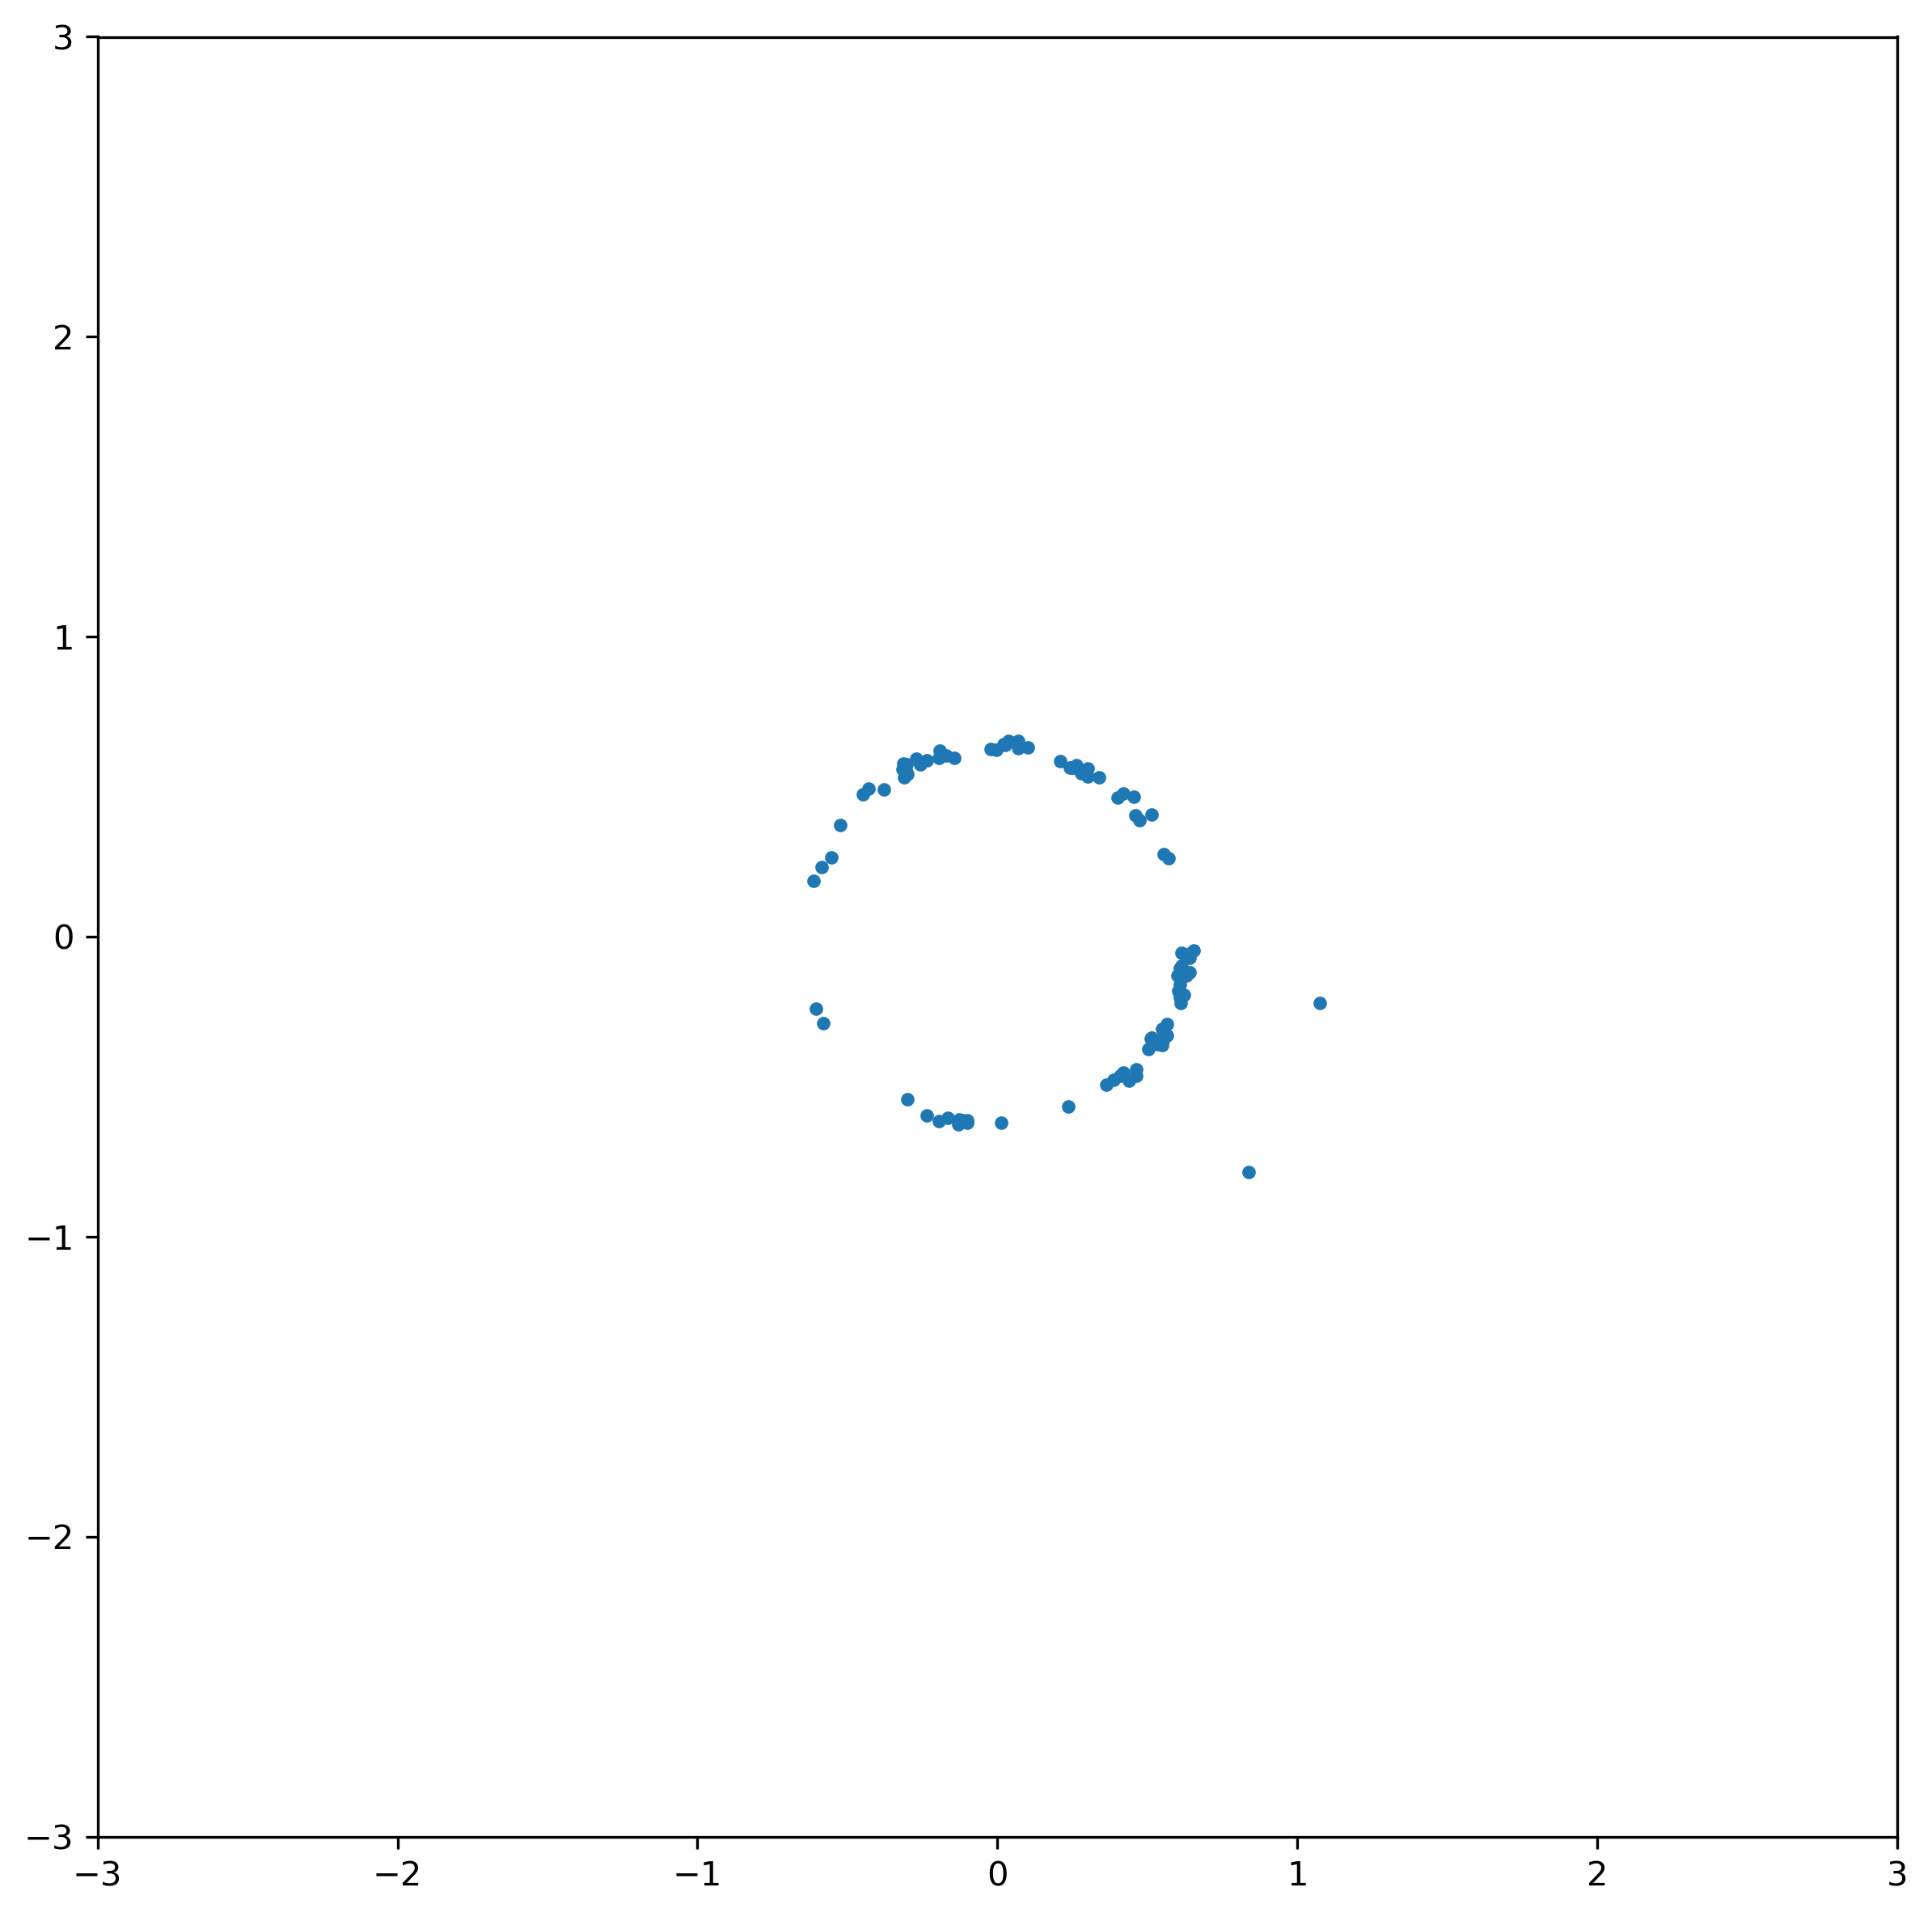

In [12]:
path = "out/"

fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

best = np.argmax(fit_history[-1])
df = pop_history[-1][best].dataframe

r, a = get_idxs(df)
radius, angle = df[r].values, df[a].values

xs, ys = radius * np.cos(angle), radius * np.sin(angle)

ax.scatter(xs, ys, marker=".")
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect("equal")

plt.tight_layout()
plt.savefig(path + "circle.pdf", transparent=True);